In [40]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [41]:
app_records = pd.read_csv('../data/application_record.csv')
credit_records = pd.read_csv('../data/credit_record.csv')

In [42]:
print(f" Application records shape: {app_records.shape}")
print(f" Credit records shape: {credit_records.shape}")

 Application records shape: (438557, 18)
 Credit records shape: (1048575, 3)


In [43]:
app_records.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [44]:
credit_records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [45]:
app_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [46]:
credit_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [47]:
print(f"Number of rows: {app_records.shape[0]}")
print(f"Number of unique values: {app_records['ID'].nunique()}")
# Number of rows > unique values == there are DUPLICATES.

# Let's drop duplicates in ID column 
app_records = app_records.drop_duplicates('ID', keep='last') 
print(f"Number of rows after dropping duplicates: {app_records.shape[0]}")

Number of rows: 438557
Number of unique values: 438510
Number of rows after dropping duplicates: 438510


In [48]:
# Let's check how many records match between the two datasets 
print(f"Number of valid instances: {len(set(app_records['ID']).intersection(set(credit_records['ID'])))}")

Number of valid instances: 36457


In [49]:
# Let's check for null values in each feature
for i in app_records.columns :
    print(f"Number of null values in {app_records[i].name} column is: {app_records[i].isnull().sum()}")

# Too many null values in OCCUPATION_TYPE column. Thus, we are dropping this column.
app_records.drop('OCCUPATION_TYPE', axis=1, inplace=True)

Number of null values in ID column is: 0
Number of null values in CODE_GENDER column is: 0
Number of null values in FLAG_OWN_CAR column is: 0
Number of null values in FLAG_OWN_REALTY column is: 0
Number of null values in CNT_CHILDREN column is: 0
Number of null values in AMT_INCOME_TOTAL column is: 0
Number of null values in NAME_INCOME_TYPE column is: 0
Number of null values in NAME_EDUCATION_TYPE column is: 0
Number of null values in NAME_FAMILY_STATUS column is: 0
Number of null values in NAME_HOUSING_TYPE column is: 0
Number of null values in DAYS_BIRTH column is: 0
Number of null values in DAYS_EMPLOYED column is: 0
Number of null values in FLAG_MOBIL column is: 0
Number of null values in FLAG_WORK_PHONE column is: 0
Number of null values in FLAG_PHONE column is: 0
Number of null values in FLAG_EMAIL column is: 0
Number of null values in OCCUPATION_TYPE column is: 134187
Number of null values in CNT_FAM_MEMBERS column is: 0


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Function to encode categorical values into numerical values
def encoded_df(df) :
    df_copy = df.copy()
    for x in df_copy:
        if df_copy[x].dtypes=='object':
            df_copy[x] = le.fit_transform(df_copy[x])
    return df_copy

# Function to create a dataframe that will map each categorical value to its encoded counterpart 
def map_cat_vars(df) :
    df_copy = df.copy()
    for i in df_copy :
        if df_copy[i].dtypes=='object':
            indices = df_copy.columns.get_loc(i)
            df_copy.insert(indices + 1, f"ENCODED_{df_copy[i].name}", le.fit_transform(df_copy[i].values))
    return df_copy

In [51]:
mapped_dataset = map_cat_vars(app_records)
mapped_dataset

,ID,CODE_GENDER,ENCODED_CODE_GENDER,FLAG_OWN_CAR,ENCODED_FLAG_OWN_CAR,FLAG_OWN_REALTY,ENCODED_FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,ENCODED_NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ENCODED_NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,1,Y,1,Y,1,0,427500.0,Working,...,0,Rented apartment,4,-12005,-4542,1,1,0,0,2.0
1,5008805,M,1,Y,1,Y,1,0,427500.0,Working,...,0,Rented apartment,4,-12005,-4542,1,1,0,0,2.0
2,5008806,M,1,Y,1,Y,1,0,112500.0,Working,...,1,House / apartment,1,-21474,-1134,1,0,0,0,2.0
3,5008808,F,0,N,0,Y,1,0,270000.0,Commercial associate,...,3,House / apartment,1,-19110,-3051,1,0,1,1,1.0
4,5008809,F,0,N,0,Y,1,0,270000.0,Commercial associate,...,3,House / apartment,1,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,1,N,0,Y,1,0,135000.0,Pensioner,...,2,House / apartment,1,-22717,365243,1,0,0,0,1.0
438553,6840222,F,0,N,0,N,0,0,103500.0,Working,...,3,House / apartment,1,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,0,N,0,N,0,0,54000.0,Commercial associate,...,3,With parents,5,-8169,-372,1,1,0,0,1.0
438555,6842765,F,0,N,0,Y,1,0,72000.0,Pensioner,...,1,House / apartment,1,-21673,365243,1,0,0,0,2.0


In [52]:
encoded_app_records = encoded_df(app_records)
encoded_app_records

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,1,4,2,1,-22717,365243,1,0,0,0,1.0
438553,6840222,0,0,0,0,103500.0,4,4,3,1,-15939,-3007,1,0,0,0,1.0
438554,6841878,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1,1,0,0,1.0
438555,6842765,0,0,1,0,72000.0,1,4,1,1,-21673,365243,1,0,0,0,2.0


In [53]:
credit_records['MONTHS_PAST'] = credit_records['MONTHS_BALANCE']*-1
credit_records.sort_values(['ID', 'MONTHS_PAST'], ascending=True)
credit_records.head(10)

,ID,MONTHS_BALANCE,STATUS,MONTHS_PAST
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [54]:
credit_records['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [55]:
credit_records['STATUS'].replace({'C':0, 'X':0, '0':0, '1':0}, inplace=True)
credit_records['STATUS'].replace(['2', '3', '4', '5'], 1 , inplace=True)
credit_records

,ID,MONTHS_BALANCE,STATUS,MONTHS_PAST
0,5001711,0,0,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,0,0
...,...,...,...,...
1048570,5150487,-25,0,25
1048571,5150487,-26,0,26
1048572,5150487,-27,0,27
1048573,5150487,-28,0,28


In [56]:
credit_records['STATUS'].value_counts(normalize=True) 
# We need to balance the data

STATUS
0    0.99704
1    0.00296
Name: proportion, dtype: float64

In [57]:
credit_records_grouped = credit_records.groupby('ID').agg(max).reset_index()
credit_records_grouped.head(10)

,ID,MONTHS_BALANCE,STATUS,MONTHS_PAST
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59
5,5001717,0,0,21
6,5001718,0,0,38
7,5001719,0,0,42
8,5001720,0,0,35
9,5001723,0,0,30


In [58]:
df = encoded_app_records.join(credit_records_grouped.set_index('ID'), on='ID', how='inner')

In [59]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,MONTHS_PAST
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,0,15
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,0,14
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0,0,0,29
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,0,0,4
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,-22,0,26
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,0,0,26
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0,0,0,38
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0,-4,0,20
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0,0,0,16
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0,-1,0,17


In [60]:
# Now let's drop some columns 
# columns to be dropped are : 
# CNT_CHILDREN: since CNT_FAM_MEMBERS will be enough for us
# FLAG_MOBIL: every one has a mobile 
# MONTHS_BALANCE and MONTHS_PAST: we don't need them anymore
df.drop(['CNT_CHILDREN', 'FLAG_MOBIL', 'MONTHS_BALANCE', 'MONTHS_PAST'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,0
1,5008805,1,1,1,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,0
2,5008806,1,1,1,112500.0,4,4,1,1,-21474,-1134,0,0,0,2.0,0
3,5008808,0,0,1,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,0
4,5008809,0,0,1,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,0


In [61]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH']*-1
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED']*-1

# Prepare data for training

In [62]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train Classifiers

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [67]:
Models = {'xgboost':XGBClassifier(), 'DecisionTree':DecisionTreeClassifier(), 'KNN':KNeighborsClassifier(),'Random Forest':RandomForestClassifier()}



-------------------------xgboost----------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7169
           1       0.98      0.98      0.98      7168

    accuracy                           0.98     14337
   macro avg       0.98      0.98      0.98     14337
weighted avg       0.98      0.98      0.98     14337



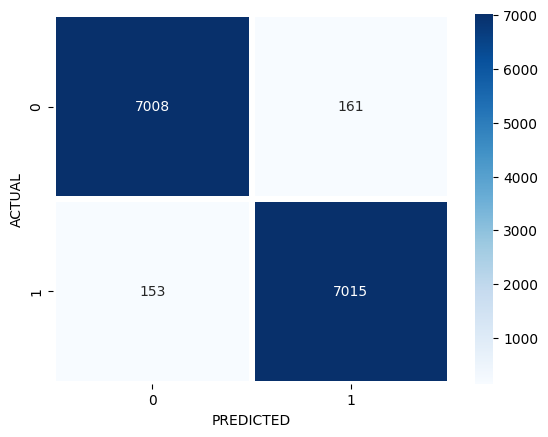

-------------------------------------------------------------------


-------------------------DecisionTree----------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7169
           1       0.98      0.99      0.98      7168

    accuracy                           0.98     14337
   macro avg       0.98      0.98      0.98     14337
weighted avg       0.98      0.98      0.98     14337



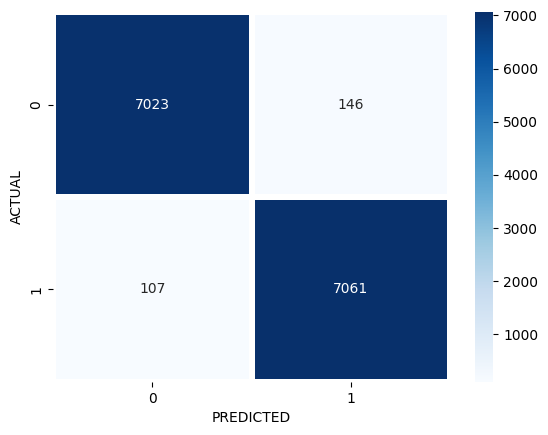

-------------------------------------------------------------------


-------------------------KNN----------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7169
           1       0.95      0.98      0.97      7168

    accuracy                           0.97     14337
   macro avg       0.97      0.97      0.97     14337
weighted avg       0.97      0.97      0.97     14337



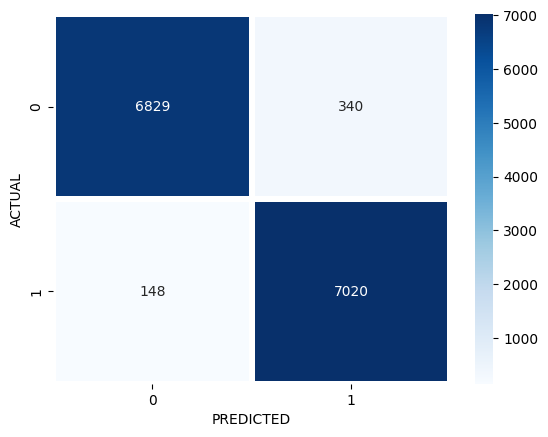

-------------------------------------------------------------------


-------------------------Random Forest----------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7169
           1       0.98      0.99      0.99      7168

    accuracy                           0.99     14337
   macro avg       0.99      0.99      0.99     14337
weighted avg       0.99      0.99      0.99     14337



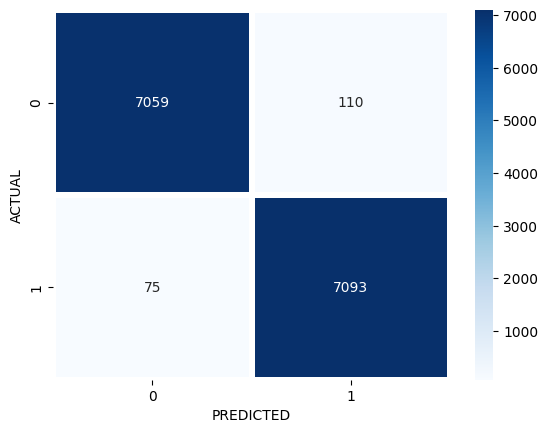

-------------------------------------------------------------------


In [68]:
import seaborn as sns 
import matplotlib.pyplot as plt 

for key, classifier in Models.items() : 
    print('\n')
    print(f"-------------------------{key}----------------------------")
    model = classifier.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(classification_report(y_test, prediction))
    sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap="Blues",linewidths=3 ,fmt='g')
    plt.xlabel("PREDICTED")
    plt.ylabel("ACTUAL")
    plt.show()
    print("-------------------------------------------------------------------")

### Random Forest is the best model

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7169
           1       0.98      0.99      0.99      7168

    accuracy                           0.99     14337
   macro avg       0.99      0.99      0.99     14337
weighted avg       0.99      0.99      0.99     14337



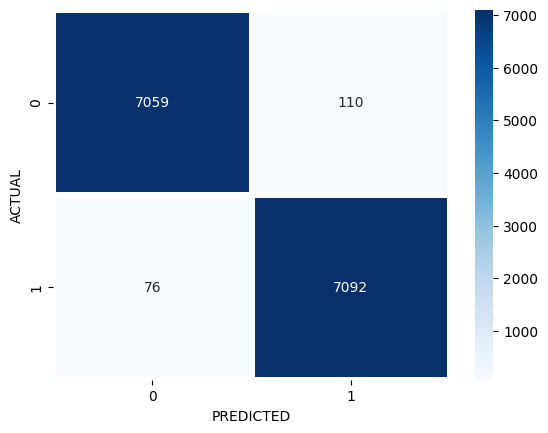

In [69]:
RF = RandomForestClassifier(n_estimators=100, n_jobs=8)
model = RF.fit(X_train, y_train)
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap="Blues",linewidths=3 ,fmt='g')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.show()

# Save and Load model

In [70]:
import pickle 
pickle.dump(model, open('credit_scoring_model.sav', 'wb'))
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [71]:
# loading the saved model
loaded_model = pickle.load(open('credit_scoring_model.sav', 'rb'))
loaded_scaler = pickle.load(open('scaler.sav', 'rb'))

## Predict New Data

In [72]:
def predict(input_arr):
    input = np.array([input_arr])
    input_reshaped = input.reshape(1,-1)
    scaled_input = loaded_scaler.transform(input_reshaped)
    results = loaded_model.predict(scaled_input)
    if results == 0 :
        return "No Risk"
    elif results == 1 :
        return "High Risk"

In [73]:
arr = [0,0,0,114430,1,4,1,1,20486,1989,0,0,0,2.000000]
predict(arr)

'High Risk'